هنا في هذا التحليل نبحث عن اجابة لعدد من الاسئلة :
كم عدد الفيديو الجيد والغير جيد من خلال البحث عند مجموعة من الكلمات وهي 
[kids , leran , spiderman , toys , elsa , songs , princess ,babysahrk ]

كم مشاهدات الفيديو الجيد  ؟  الغير جيد ؟ 
كم عدد الاعجاب  للجيد  وغير الجيد ؟
كم عدد غير الاعجاب للجيد والغير جيد ؟ 
كم عدد الردود  للجيد وغير الجيد ؟ 
 الكلمات الاكثر في عنوان الفيديو الجيد ؟
 الكلمات الاكثر في عنوان لفيديو غير الجيد ؟ 
 الكلمات الاكثر في تعليقات  الفيديو الجيد ؟
 الكلمات الاكثر تعليقات في الفيديو غير الجيد ؟
 ماهي الفئة العمرية الاعلى للفيديو ؟
 ماهو التصنيف الاعلى للجيد ؟ 
 ماهو التصنيف الاعلى للغير جيد ؟ 
 
 

# Import Libraries 



In [ ]:
 access to Youtube API

In [22]:

import sys
!{sys.executable} -m pip install --upgrade google-api-python-client
!{sys.executable} -m pip install google_auth_oauthlib

Requirement already up-to-date: google-api-python-client in c:\programdata\anaconda3\lib\site-packages (1.7.11)


In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
from apiclient.discovery import build
from apiclient.errors import HttpError
import pprint 
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import warnings
from collections import Counter
import datetime
import wordcloud
import json


IMPORT OUR DATA 

In [2]:
# read the data file
mydf = pd.read_csv('vido_youtube11.csv', encoding = 'latin-1')

In [3]:
mydf.head(10)

,pubDate,tags,channelId,channelTitle,categoryId,type,typecat,catage,title,videoId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,keyword
0,2019-08-31T08:00:44.000Z,"['ABS-CBN', 'The Voice', 'The Voice Kids', 'Th...",UCv9Z8nhjtaiWykNYQFNrL4g,The Voice Kids Philippines,24,good,entertament,4-10,"LIVE: The Voice Kids DigiTV | August 31, 2019",REQjMtyHfKs,4800,470.0,14.0,0,0,kids
1,2019-03-12T05:00:00.000Z,"['cars for kids', 'kids toys', 'for kids', 'ca...",UCvlE5gTbOvjiolFlEm-c_Ow,Vlad and Nikita,24,good,entertament,4-10,Vlad and Nikita play with Toy Cars - Collectio...,NtzftGb0EcM,134076123,452872.0,209488.0,0,0,kids
2,2019-08-30T12:45:06.000Z,"['abc song', 'nursery rhyme song', 'kids songs...",UC7Pq3Ko42YpkCB_Q4E981jw,Kids TV - Nursery Rhymes And Baby Songs,27,good,educational,0-4,ABC Song | Baby Nursery Rhymes &amp; Kids Song...,h5rQnf77frY,199196,1215.0,899.0,0,0,kids
3,2019-08-30T12:45:06.000Z,"['abc song', 'nursery rhyme song', 'kids songs...",UC7Pq3Ko42YpkCB_Q4E981jw,Kids TV - Nursery Rhymes And Baby Songs,27,good,educational,4-10,ABC Song | Baby Nursery Rhymes &amp; Kids Song...,h5rQnf77frY,199196,1215.0,899.0,0,0,kids
4,2019-07-26T12:00:05.000Z,"['toys and colors', 'nursery rhymes', 'sing-al...",UCgFXm4TI8htWmCyJ6cVPG_A,Toys and Colors,24,good,educational,4-10,Kids Go Shopping Song | Wendy &amp; Emma Prete...,Myn4kPK-Bms,13832765,57556.0,23924.0,0,0,kids
5,2019-06-10T20:47:37.000Z,"['ì¥ëê°', 'toy', 'í ì´ëë ¸', 'Toydino'...",UCy7PtHS0_bX8kiSddrjrI5A,Toy Dino TV,24,good,educational,4-10,"Lots of dinosaurs eggs, Leran names, learn num...",J98AN_SFXEg,74523,225.0,93.0,0,4,leran
6,2017-09-20T14:39:34.000Z,"['[Colors', 'Children', 'Learn Color', 'Colour...",UCO-tQZiWU5bZHERe8gqxJjQ,Sunny KidsTV Eggs,27,good,educational,0-4,Leran Colors with A lot of 3D Lollipop Guitar ...,1wTChlTwt0k,6529,15.0,3.0,0,7,leran
7,2018-11-10T14:17:50.000Z,"['learn colours', 'Leran Colors With Play-doh'...",UCnKvh0dYtp1Mk0o9XoXC62A,ahadaf kooora,24,good,educational,0-4,Leran Colors With Play-doh and Toys and Dinosaur,jNb_6EvmDPE,1317,28.0,2.0,0,0,leran
8,2017-04-22T12:04:05.000Z,"['surprise', 'kids', 'toy', 'toys', 'Fun Creat...",UCkvWlsTswUtMVrEzlu-1sVg,YL Toys Collection,24,bad,bad behavior,4-10,Yogurt Surprise Play Doh + Play Foam + Slime +...,E6p1Bd7t7BI,43434,NaN,NaN,0,0,leran
9,2018-07-07T06:36:31.000Z,['animals wrong kids matching game for childre...,UCvsMJuKN5n6Li0pp6oHrFwQ,KIDZ RHYMES,27,good,educational,0-4,Animals wrong baby matching game for toddlers ...,f7w-ZnyBqrs,1935023,2682.0,1314.0,0,46,leran


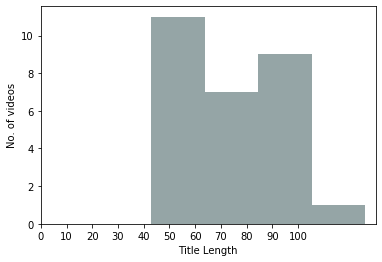

In [4]:
mydf["title_length"] = mydf["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(mydf["title_length"], kde=False, rug=False, 
                 color="#95a5a6", hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

In [6]:
mydf_good=mydf[mydf["type"]=="good"]
mydf_good 

,pubDate,tags,channelId,channelTitle,categoryId,type,typecat,catage,title,videoId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,keyword,title_length
0,2019-08-31T08:00:44.000Z,"['ABS-CBN', 'The Voice', 'The Voice Kids', 'Th...",UCv9Z8nhjtaiWykNYQFNrL4g,The Voice Kids Philippines,24,good,entertament,4-10,"LIVE: The Voice Kids DigiTV | August 31, 2019",REQjMtyHfKs,4800,470.0,14.0,0,0,kids,45
1,2019-03-12T05:00:00.000Z,"['cars for kids', 'kids toys', 'for kids', 'ca...",UCvlE5gTbOvjiolFlEm-c_Ow,Vlad and Nikita,24,good,entertament,4-10,Vlad and Nikita play with Toy Cars - Collectio...,NtzftGb0EcM,134076123,452872.0,209488.0,0,0,kids,62
2,2019-08-30T12:45:06.000Z,"['abc song', 'nursery rhyme song', 'kids songs...",UC7Pq3Ko42YpkCB_Q4E981jw,Kids TV - Nursery Rhymes And Baby Songs,27,good,educational,0-4,ABC Song | Baby Nursery Rhymes &amp; Kids Song...,h5rQnf77frY,199196,1215.0,899.0,0,0,kids,68
3,2019-08-30T12:45:06.000Z,"['abc song', 'nursery rhyme song', 'kids songs...",UC7Pq3Ko42YpkCB_Q4E981jw,Kids TV - Nursery Rhymes And Baby Songs,27,good,educational,4-10,ABC Song | Baby Nursery Rhymes &amp; Kids Song...,h5rQnf77frY,199196,1215.0,899.0,0,0,kids,68
4,2019-07-26T12:00:05.000Z,"['toys and colors', 'nursery rhymes', 'sing-al...",UCgFXm4TI8htWmCyJ6cVPG_A,Toys and Colors,24,good,educational,4-10,Kids Go Shopping Song | Wendy &amp; Emma Prete...,Myn4kPK-Bms,13832765,57556.0,23924.0,0,0,kids,85
5,2019-06-10T20:47:37.000Z,"['ì¥ëê°', 'toy', 'í ì´ëë ¸', 'Toydino'...",UCy7PtHS0_bX8kiSddrjrI5A,Toy Dino TV,24,good,educational,4-10,"Lots of dinosaurs eggs, Leran names, learn num...",J98AN_SFXEg,74523,225.0,93.0,0,4,leran,126
6,2017-09-20T14:39:34.000Z,"['[Colors', 'Children', 'Learn Color', 'Colour...",UCO-tQZiWU5bZHERe8gqxJjQ,Sunny KidsTV Eggs,27,good,educational,0-4,Leran Colors with A lot of 3D Lollipop Guitar ...,1wTChlTwt0k,6529,15.0,3.0,0,7,leran,67
7,2018-11-10T14:17:50.000Z,"['learn colours', 'Leran Colors With Play-doh'...",UCnKvh0dYtp1Mk0o9XoXC62A,ahadaf kooora,24,good,educational,0-4,Leran Colors With Play-doh and Toys and Dinosaur,jNb_6EvmDPE,1317,28.0,2.0,0,0,leran,48
9,2018-07-07T06:36:31.000Z,['animals wrong kids matching game for childre...,UCvsMJuKN5n6Li0pp6oHrFwQ,KIDZ RHYMES,27,good,educational,0-4,Animals wrong baby matching game for toddlers ...,f7w-ZnyBqrs,1935023,2682.0,1314.0,0,46,leran,88
14,2019-08-30T12:45:01.000Z,"['paw patrol', 'mighty pups', 'super paws', 'c...",UCfaZw8XH_zmAVkBst_MPD6w,CKN Toys,24,good,entertament,4-10,PAW Patrol New Mighty Lookout Tower Super Pups...,5ZmEkIO3W1E,1031260,3897.0,1346.0,0,0,toys,55


In [7]:

title_words = list(mydf_good["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)


[('|', 14),
 ('and', 10),
 ('Songs', 10),
 ('Kids', 7),
 ('for', 7),
 ('Baby', 6),
 ('with', 5),
 ('&amp;', 4),
 ('Children', 4),
 ('Toys', 4),
 ('Shark', 4),
 ('Song', 3),
 ('Nursery', 3),
 ('Rhymes', 3),
 ('of', 3),
 ('Leran', 3),
 ('kids', 2),
 ('ABC', 2),
 ('Kindergarten', 2),
 ('Wendy', 2),
 ('Pretend', 2),
 ('Play', 2),
 ('dinosaurs', 2),
 ('Colors', 2),
 ('Pinkfong', 2)]

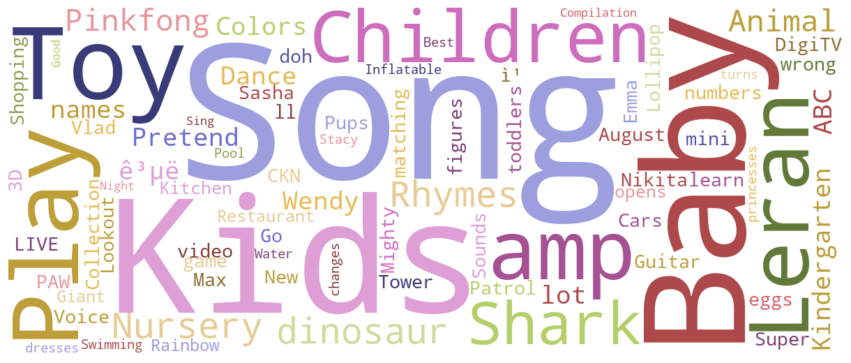

In [8]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [9]:
mydf_bad=mydf[mydf["type"]!="good"]
mydf_bad 

,pubDate,tags,channelId,channelTitle,categoryId,type,typecat,catage,title,videoId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,keyword,title_length
8,2017-04-22T12:04:05.000Z,"['surprise', 'kids', 'toy', 'toys', 'Fun Creat...",UCkvWlsTswUtMVrEzlu-1sVg,YL Toys Collection,24,bad,bad behavior,4-10,Yogurt Surprise Play Doh + Play Foam + Slime +...,E6p1Bd7t7BI,43434,NaN,NaN,0,0,leran,99
10,2019-08-29T20:00:03.000Z,"['Spider-Man', 'Tom Holland', 'MCU', 'Marvel C...",UC2iUwfYi_1FCGGqhOUNx-iA,Screen Rant,1,bad,indication,10-15,10 Reasons The MCU Is Doomed Without Spider-Man,USrOgP3W5xY,108078,2614.0,358.0,0,519,spiderman,47
11,2019-05-06T13:00:32.000Z,"['Peter Parker', 'Spider-Man', 'Spiderman', 'S...",UCz97F7dMxBNOfGYu3rx8aCw,Sony Pictures Entertainment,24,bad,violence,10-15,SPIDER-MAN: FAR FROM HOME - Official Trailer,Nt9L1jCKGnE,75964270,1872192.0,34568.0,0,113503,spiderman,44
12,2016-09-29T07:50:12.000Z,"['Hulk vs Spiderman', 'Hulk vs Spider-Man', 'S...",UCP-CAwOG0AiieZNFdONsN5Q,KjraGaming,20,bad,violence,4-10,BIG HULK VS SPIDERMAN - THE INCREDIBLE HULK VS...,KF4hH8wUXWw,105959671,202272.0,93309.0,0,3824,spiderman,64
13,2019-08-27T16:00:01.000Z,"['Spider-Man', 'Far From Home', 'HISHE', 'how ...",UCHCph-_jLba_9atyCZJPLQQ,How It Should Have Ended,1,bad,indication,10-15,How Spider-Man Far From Home Should Have Ended,49CmxQjVG8Q,6251546,258786.0,4890.0,0,11151,spiderman,46
17,2019-08-30T21:26:32.000Z,"['4 colors play doh ice cream cups', 'learn co...",UCCRW-jF3AhKcF1TeBSXlgKA,ÐÑÐµÐ»ÐºÐ°,24,bad,bad behavior,4-10,Toy Colors Play Doh Ice Cream Cups PJ Masks Ch...,Qy-z-7G1GeA,48465,NaN,NaN,0,0,toys,98
18,2019-08-31T05:44:32.000Z,"['play doh', 'play doh ice cream', 'Play Doh I...",UCvWCxo3VGpa065BrYImITyA,Kids Island,24,bad,bad behavior,4-10,"Toy Play Doh Ice Cream Cups - Shopkins, LOL Su...",YDQYezRJqOU,30526,NaN,NaN,0,0,toys,92
19,2019-01-07T11:58:45.000Z,"['Once Upon A Time', 'Elsa - All Scenes Powers...",UCNjc2f7zhhRUs5ric61Eg1Q,Explore Wh!te,1,bad,bad behavior,4-10,Elsa - All Scenes Powers | Once Upon A Time,BOwkXn9ma1E,2267516,15250.0,1911.0,0,495,elsa,43
20,2019-08-31T09:30:17.000Z,"['Arabian Fairy Tales', 'Equestria Girls Princ...",UCo75zHSLMD5nac5xirUeqhw,KCN Channel TV2,1,bad,indication,4-10,ÙÙØ¯Øª Ø§ÙØ¬ÙÙØ© | Equestria Girls Prince...,cfVONmkfeuA,5264,554.0,105.0,0,0,princess,86
21,2019-08-31T01:04:34.000Z,No Tags,UCHdJXW8DsJ8LVWTPNKELVDg,Mlp Magic Official,1,bad,indication,4-10,ÙØªÙØ§Øª Ø§ÙÙØ±ÙØ³ÙØ© | Equestria Girls ...,mUmZ4QjSpvs,199342,1173.0,287.0,0,30,princess,92


In [10]:

title_words = list(mydf_bad["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)


[('Surprise', 6),
 ('|', 5),
 ('Play', 4),
 ('-', 4),
 ('Doh', 3),
 ('+', 3),
 ('A', 3),
 ('Colors', 2),
 ('Toys', 2),
 ('Spider-Man', 2),
 ('HULK', 2),
 ('VS', 2),
 ('Toy', 2),
 ('Ice', 2),
 ('Cream', 2),
 ('Cups', 2),
 ('Chupa', 2),
 ('LOL', 2),
 ('Kinder', 2),
 ('Eggs', 2),
 ('Equestria', 2),
 ('Girls', 2),
 ('Princess', 2),
 ('Story', 2),
 ('in', 2)]

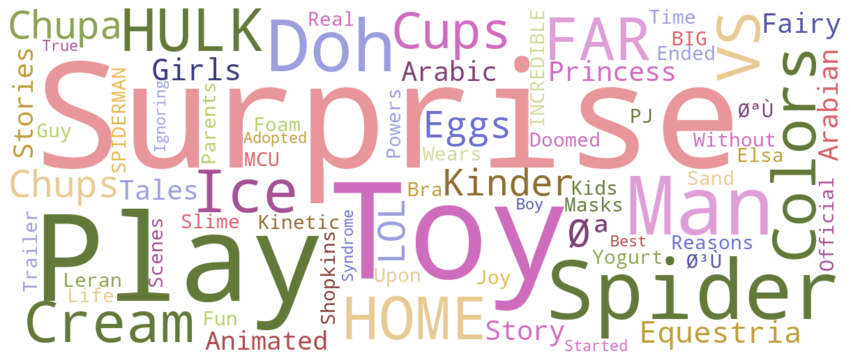

In [11]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [12]:

title_words = list(mydf_good["tags"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)


[("'kids", 37),
 ('for', 29),
 ("songs',", 22),
 ("kids',", 19),
 ("'baby", 19),
 ("song',", 18),
 ("rhymes',", 13),
 ("toys',", 11),
 ("'nursery", 10),
 ("'songs", 10),
 ("children',", 10),
 ("'for", 9),
 ('shark', 9),
 ("'The", 8),
 ("videos',", 8),
 ('Voice', 7),
 ('Kids', 6),
 ('and', 5),
 ("'children", 5),
 ("learning',", 5),
 ("'education',", 5),
 ("'preschool',", 5),
 ("'toddlers',", 5),
 ("'dinosaur", 5),
 ("'learn", 5)]

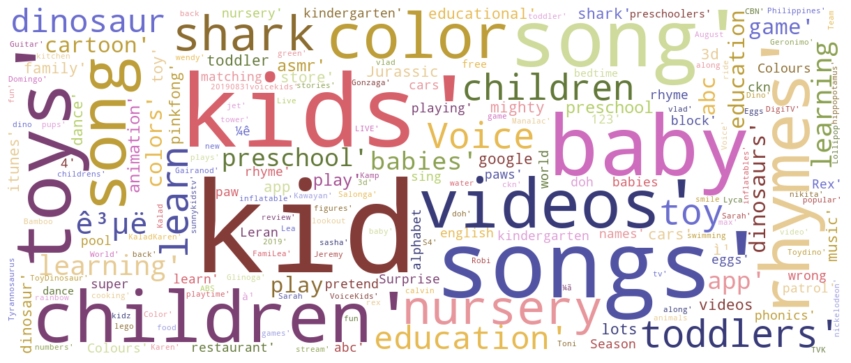

In [13]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [14]:

title_words = list(mydf_bad["tags"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)


[("'Ù\x82ØµØµ", 19),
 ('vs', 11),
 ("Hulk',", 9),
 ('From', 7),
 ("'Spider-Man", 7),
 ("'The", 7),
 ('Hulk', 7),
 ("toys',", 7),
 ('surprise', 7),
 ("'learn", 6),
 ("Trailer',", 6),
 ('Ù\x82Ø¨Ù\x84', 6),
 ('Ø§Ù\x84Ù\x86Ù\x88Ù', 6),
 ("'Far", 5),
 ("vs',", 5),
 ("',", 5),
 ("stories',", 5),
 ("Home',", 4),
 ('Home', 4),
 ("'Spiderman", 4),
 ("Spiderman',", 4),
 ("Spider-Man',", 4),
 ("'Big", 4),
 ("'surprise", 4),
 ("eggs',", 4)]

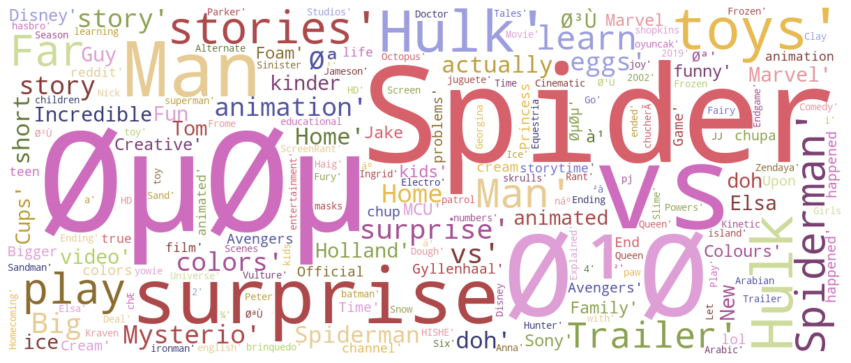

In [75]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [15]:
mydf1 = mydf["type"].value_counts()
mydf1


good    16
bad     12
Name: type, dtype: int64

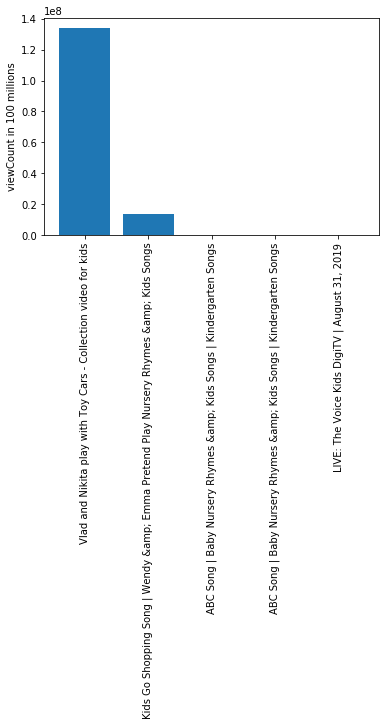

In [16]:

mydf_good=mydf_good.head(5)
mydf_good = mydf_good.sort_values(ascending=False,by='viewCount')
plt.bar(range(mydf_good.shape[0]),mydf_good['viewCount'])
plt.xticks(range(mydf_good.shape[0]),mydf_good['title'],rotation=90)
plt.ylabel('viewCount in 100 millions')

plt.show()




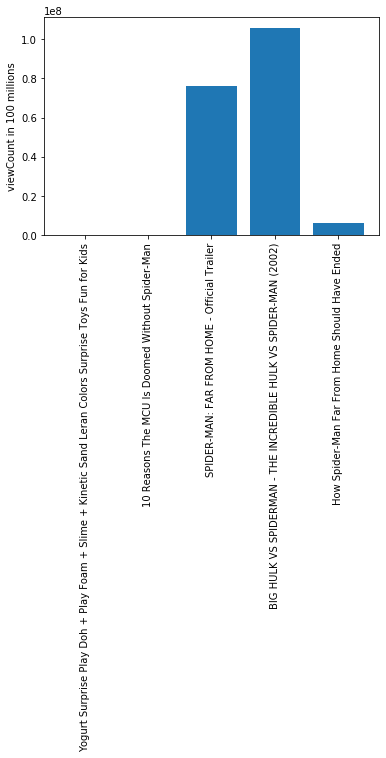

In [17]:
mydf_bad=mydf_bad.head(5)
mydf_good = mydf_bad.sort_values(ascending=True,by='viewCount')
plt.bar(range(mydf_bad.shape[0]),mydf_bad['viewCount'])
plt.xticks(range(mydf_bad.shape[0]),mydf_bad['title'],rotation=90)
plt.ylabel('viewCount in 100 millions')

plt.show()

In [18]:
mydfage = mydf["catage"].value_counts()
mydfage

4-10     21
0-4       4
10-15     3
Name: catage, dtype: int64

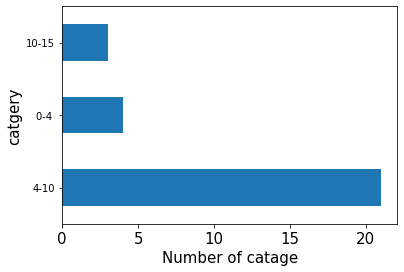

In [19]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Number of catage', fontsize=15)
ax.set_ylabel('catgery' , fontsize=15)

mydfage.plot(ax=ax, kind='barh')

In [20]:
import seaborn as sns

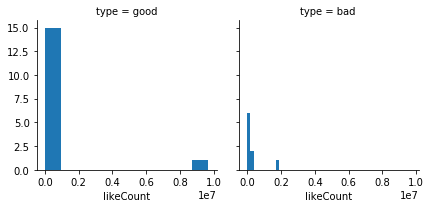

In [21]:
g = sns.FacetGrid(data=mydf, col='type')
g.map(plt.hist, 'likeCount', bins=10)

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

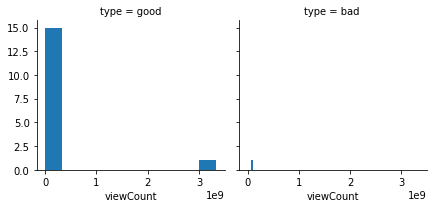

In [22]:
g = sns.FacetGrid(data=mydf, col='type')
g.map(plt.hist, 'viewCount', bins=10)

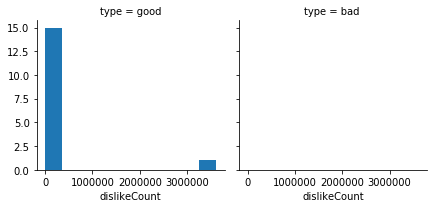

In [23]:
g = sns.FacetGrid(data=mydf, col='type')
g.map(plt.hist, 'dislikeCount', bins=10)

In [24]:
mydfcattyp = mydf["typecat"].value_counts()
mydfcattyp

entertament     9
educational     7
indication      6
bad behavior    4
violence        2
Name: typecat, dtype: int64

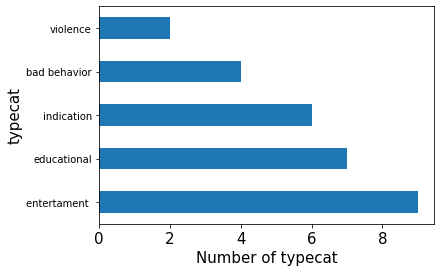

In [25]:
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Number of typecat', fontsize=15)
ax.set_ylabel('typecat' , fontsize=15)

mydfcattyp.plot(ax=ax, kind='barh')